## Draper adder
This notebook is devoted to studying the Draper adder.

### Important note 1 about DraperQFTAdder function (circuit).
- The lower bit in the circuit drawing in the highest bit in the binary number.
- The  highest bit in the circuit drawing in the lowes bit in the binary number.
- The added perfroms adding binary numbers modulo 2^n, where n in the number of qubits in the numbers we add.

For example 10+10=00,  11+11=10, 01+01=10 etc

### link to Draper adder description
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.DraperQFTAdder

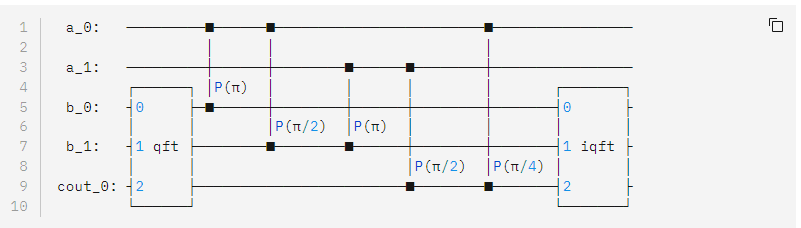

### How many operations one needs to do add two numbers?


In [23]:
import qiskit


from qiskit.circuit.library import DraperQFTAdder

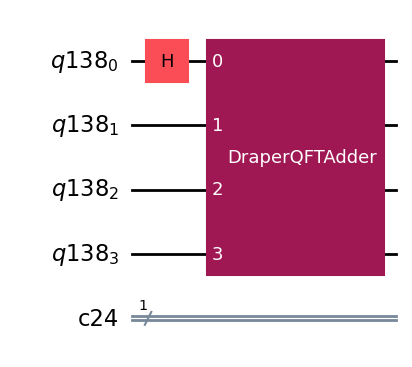

In [116]:
qreg=qiskit.QuantumRegister(4)
clreg=qiskit.ClassicalRegister(1)
qc = qiskit.QuantumCircuit(qreg,clreg)
qc.h(0)
#qc.x(1)
#qc.x(3)
#qc.x(2)
qc.draw('mpl')
qc.append(DraperQFTAdder(2,kind='fixed', name='DraperQFTAdder'),[qreg[0],qreg[1],qreg[2],qreg[3]])
#qc.measure(1,0)
#qc.measure(0,0)
qc.draw('mpl')

In [117]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector


In [119]:
state_simulator = Aer.get_backend('statevector_simulator')
circ = transpile(qc, state_simulator)
result = state_simulator.run(circ).result()
psi = result.get_statevector(qc)
print(f'psi = {psi.round(2)!r}')
Psi_list=list(psi)
plot_bloch_multivector(psi)
Psi_list

psi = array([ 0.71-0.j, -0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.71-0.j,
        0.  +0.j,  0.  +0.j, -0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
       -0.  +0.j, -0.  +0.j,  0.  +0.j,  0.  +0.j])


C:\Users\Oleg\AppData\Local\Temp\ipykernel_10292\2254718841.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(f'psi = {psi.round(2)!r}')
C:\Users\Oleg\AppData\Local\Temp\ipykernel_10292\2254718841.py:6: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  Psi_list=list(psi)


[(0.7071067811865477-8.659560562354937e-17j),
 (-5.596930024394151e-17+3.0626305379607865e-17j),
 0j,
 0j,
 (8.977403973720522e-18+3.432039883805416e-17j),
 (0.7071067811865477-1.2989340843532405e-16j),
 0j,
 0j,
 (-2.2993471702930928e-17+4.329780281177468e-17j),
 (3.0626305379607865e-17+5.59693002439415e-17j),
 0j,
 0j,
 (-3.432039883805416e-17+8.977403973720519e-18j),
 (-2.2993471702930925e-17+4.329780281177468e-17j),
 0j,
 0j]

In [203]:
import math
def show_state_vector(state,prec,dec_numb):
    state_len=len(state)
    #print(state_len)
    n=int(math.log(state_len,2))
    #print(n)
    for i in range(0,state_len):
        zz=str(bin(i))
        zz=zz.replace('0b','')
        len_str=len(zz)
        dl=n-len_str
        ss=''
        for j in range(0,dl):
            ss=ss+'0'
        zz=ss+zz
        sr=round(state[i].real,dec_numb)
        si=round(state[i].imag,dec_numb)
        if state[i].real<prec:
            sr=0
        if state[i].imag<prec:
            si=0
        ss=sr+1j*si
        print([zz,ss])
    


In [204]:
show_state_vector(psi,0.05,2)

['0000', (0.71+0j)]
['0001', 0j]
['0010', 0j]
['0011', 0j]
['0100', 0j]
['0101', (0.71+0j)]
['0110', 0j]
['0111', 0j]
['1000', 0j]
['1001', 0j]
['1010', 0j]
['1011', 0j]
['1100', 0j]
['1101', 0j]
['1110', 0j]
['1111', 0j]


C:\Users\Oleg\AppData\Local\Temp\ipykernel_10292\2885390511.py:3: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  state_len=len(state)
